In [1]:
import pandas as pd
import numpy as np
import sys,os

In [2]:
D = [[1,3],[2,4],[3,2],[4,4],[5,5]]
D

[[1, 3], [2, 4], [3, 2], [4, 4], [5, 5]]

In [7]:
dataset=pd.DataFrame(D,columns=['x','y'])

In [31]:
dataset.mean(axis=0)

x    3.0
y    3.6
dtype: float64

In [34]:
mean_x=dataset.mean(axis=0)[0]
mean_y=dataset.mean(axis=0)[1]

In [35]:
mean_x,mean_y

(3.0, 3.6)

In [65]:
def diff(col,meanval):
    row = dataset[col]
    print(row)
    diff_col=[]
    for i in row:
        diff = i-meanval
        diff_col.append(diff)
    print(diff_col)
    return diff_col
        

In [68]:
x_xmean=diff('x',mean_x)

0    1
1    2
2    3
3    4
4    5
Name: x, dtype: int64
[-2.0, -1.0, 0.0, 1.0, 2.0]


In [69]:
x_xmean

[-2.0, -1.0, 0.0, 1.0, 2.0]

In [70]:
dataset['x_xmean'] = x_xmean # adding new column in existing dataset

In [98]:
dataset

,x,y,x_xmean,y_ymean,sqr_x_xmean,x_xmean*y_ymean
0,1,3,-2.0,-0.6,4.0,1.2
1,2,4,-1.0,0.4,1.0,-0.4
2,3,2,0.0,-1.6,0.0,-0.0
3,4,4,1.0,0.4,1.0,0.4
4,5,5,2.0,1.4,4.0,2.8


In [93]:
def dis(x,mean_x):
    print(x-mean_x)
    return x-mean_x

In [96]:
#dataset[['x']].apply(dis,axis=0,args=([mean_x]),result_type='expand') #ask vaibhav what is wrong in this code (I was tring to add new column using apply function)

In [97]:
y_ymean = diff('y',mean_y)

0    3
1    4
2    2
3    4
4    5
Name: y, dtype: int64
[-0.6000000000000001, 0.3999999999999999, -1.6, 0.3999999999999999, 1.4]


In [74]:
y_ymean

[-0.6000000000000001, 0.3999999999999999, -1.6, 0.3999999999999999, 1.4]

In [75]:
dataset['y_ymean'] = y_ymean

In [76]:
dataset

,x,y,x_xmean,y_ymean,sqr_x_xmean,x_xmean*y_ymean
0,1,3,-2.0,-0.6,4.0,-0.0
1,2,4,-1.0,0.4,1.0,-1.0
2,3,2,0.0,-1.6,0.0,-0.0
3,4,4,1.0,0.4,1.0,1.0
4,5,5,2.0,1.4,4.0,4.0


In [77]:
dataset['sqr_x_xmean'] = dataset['x_xmean']**2

In [78]:
dataset

,x,y,x_xmean,y_ymean,sqr_x_xmean,x_xmean*y_ymean
0,1,3,-2.0,-0.6,4.0,-0.0
1,2,4,-1.0,0.4,1.0,-1.0
2,3,2,0.0,-1.6,0.0,-0.0
3,4,4,1.0,0.4,1.0,1.0
4,5,5,2.0,1.4,4.0,4.0


In [79]:
dataset['x_xmean*y_ymean'] = dataset['x_xmean']*dataset['y_ymean']

In [80]:
dataset

,x,y,x_xmean,y_ymean,sqr_x_xmean,x_xmean*y_ymean
0,1,3,-2.0,-0.6,4.0,1.2
1,2,4,-1.0,0.4,1.0,-0.4
2,3,2,0.0,-1.6,0.0,-0.0
3,4,4,1.0,0.4,1.0,0.4
4,5,5,2.0,1.4,4.0,2.8


In [131]:
dataset.apply(lambda x: sum(x) ,axis=0) ## using lambda function. You don't need to define a function for simple operation

x                  4.500000e+01
y                  5.400000e+01
x_xmean            0.000000e+00
y_ymean           -1.332268e-15
sqr_x_xmean        3.000000e+01
x_xmean*y_ymean    1.200000e+01
dtype: float64

In [132]:
dataset

,x,y,x_xmean,y_ymean,sqr_x_xmean,x_xmean*y_ymean
0,1.0,3.0,-2.0,-6.000000e-01,4.0,1.2
1,2.0,4.0,-1.0,4.000000e-01,1.0,-0.4
2,3.0,2.0,0.0,-1.600000e+00,0.0,-0.0
3,4.0,4.0,1.0,4.000000e-01,1.0,0.4
4,5.0,5.0,2.0,1.400000e+00,4.0,2.8
5,30.0,36.0,0.0,-8.881784e-16,20.0,8.0


In [133]:
dataset.loc[5,:]=dataset.apply(lambda x: sum(x) ,axis=0) ## adding a row in dataframe

In [140]:
dataset.drop(index=[5],inplace=True) ## Deleting the row by specifying index location

In [141]:
dataset

,x,y,x_xmean,y_ymean,sqr_x_xmean,x_xmean*y_ymean
0,1.0,3.0,-2.0,-0.6,4.0,1.2
1,2.0,4.0,-1.0,0.4,1.0,-0.4
2,3.0,2.0,0.0,-1.6,0.0,-0.0
3,4.0,4.0,1.0,0.4,1.0,0.4
4,5.0,5.0,2.0,1.4,4.0,2.8


In [147]:
Num = np.sum(dataset['x_xmean*y_ymean'])

In [148]:
Num

4.0

In [149]:
Den = np.sum(dataset['sqr_x_xmean'])

In [150]:
Den

10.0

In [152]:
B1 = Num/Den
B1

0.4

In [155]:
B0 = mean_y-(B1*mean_x)
B0

2.4

In [156]:
dataset['y_pred'] = (B1*(dataset['x']))+B0

In [157]:
dataset

,x,y,x_xmean,y_ymean,sqr_x_xmean,x_xmean*y_ymean,y_pred
0,1.0,3.0,-2.0,-0.6,4.0,1.2,2.8
1,2.0,4.0,-1.0,0.4,1.0,-0.4,3.2
2,3.0,2.0,0.0,-1.6,0.0,-0.0,3.6
3,4.0,4.0,1.0,0.4,1.0,0.4,4.0
4,5.0,5.0,2.0,1.4,4.0,2.8,4.4


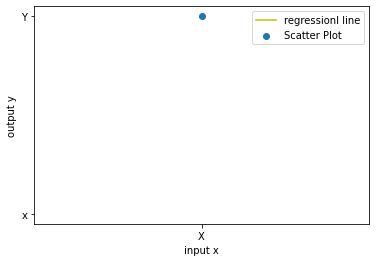

In [179]:
plt.rcParams.keys
plt.plot('x','y',label='regressionl line')
plt.scatter('X','Y',label='Scatter Plot')
plt.xlabel('input x')
plt.ylabel('output y')
plt.legend()
plt.show()

In [163]:
dataset['sqr_y_ymean'] = dataset['y_ymean'].apply(lambda x: x**2)
dataset

,x,y,x_xmean,y_ymean,sqr_x_xmean,x_xmean*y_ymean,y_pred,sqr_y_ymean
0,1.0,3.0,-2.0,-0.6,4.0,1.2,2.8,0.36
1,2.0,4.0,-1.0,0.4,1.0,-0.4,3.2,0.16
2,3.0,2.0,0.0,-1.6,0.0,-0.0,3.6,2.56
3,4.0,4.0,1.0,0.4,1.0,0.4,4.0,0.16
4,5.0,5.0,2.0,1.4,4.0,2.8,4.4,1.96


In [164]:
denom = sum(dataset['sqr_y_ymean'])
denom

5.2

In [167]:
dataset['sqr_ypred_ymean'] = dataset['y_pred'].apply(lambda x: (x-mean_y)**2)
dataset

,x,y,x_xmean,y_ymean,sqr_x_xmean,x_xmean*y_ymean,y_pred,sqr_y_ymean,ypred_ymean,sqr_ypred_ymean
0,1.0,3.0,-2.0,-0.6,4.0,1.2,2.8,0.36,0.64,0.64
1,2.0,4.0,-1.0,0.4,1.0,-0.4,3.2,0.16,0.16,0.16
2,3.0,2.0,0.0,-1.6,0.0,-0.0,3.6,2.56,0.00,0.00
3,4.0,4.0,1.0,0.4,1.0,0.4,4.0,0.16,0.16,0.16
4,5.0,5.0,2.0,1.4,4.0,2.8,4.4,1.96,0.64,0.64


In [168]:
num = sum(dataset['sqr_ypred_ymean'])

In [169]:
R = num/denom
R

0.3076923076923078

In [170]:
import matplotlib.pyplot as plt

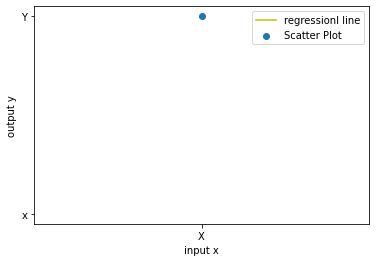

In [178]:
plt.rcParams.keys
plt.plot('x','y',label='regressionl line')
plt.scatter('X','Y',label='Scatter Plot')
plt.xlabel('input x')
plt.ylabel('output y')
plt.legend()
plt.show()